## 1. seaborn图表控制(controlling figure aesthetics)

Seaborn将matplotlib参数分成两个独立的组。第一组设定图表的样式风格；第二组设定图表元素的单位(scales)，这样就可以很容易地应用到不同场景中（画不同scale的图表）。

操作这些参数的接口是两对函数。对于设置样式，使用`axes_style()`和`set_style()`函数。对于设置单位（scale），使用`plotting_context()`和`set_context()`函数。在这两种情况下，第一个函数`axes_style()`和`plotting_context()`返回一个参数字典，第二个函数`set_style()`和`set_context()`则设置matplotlib默认属性。

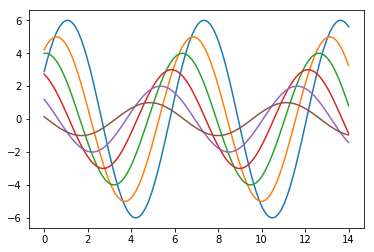

In [3]:
%matplotlib inline
# jupyter notebook 中的魔法函数，如果不是使用该软件，请使用plt.show()用于显示图片
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
np.random.seed(sum(map(ord, "aesthetics")))  # 定义种子 

# 函数定义
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i*.5)*(7-i)*flip)

sinplot()

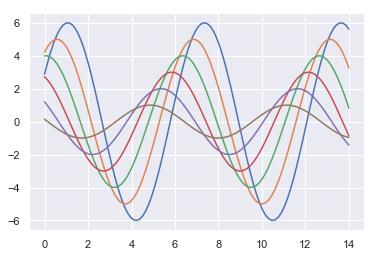

In [5]:
import seaborn as sns

sns.set()
sinplot()

### 1.1. 样式控制：axes_style() & set_style()（seaborn figure styles）


**(a) seaborn样式设置**

seaborn自带5种样式：

 + darkgrid 黑色网格（默认）；
 + whitegrid 白色网格（适合用于大数据量的图）；
 + dark 黑色背景；
 + white 白色背景；
 + ticks 应该是四周都有刻度线的白背景？；
 

whitegrid样式：

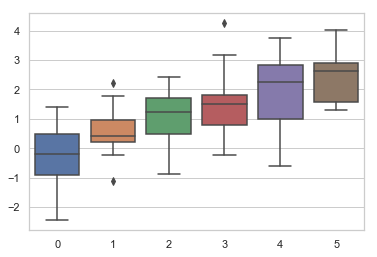

In [28]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6)/2
sns.boxplot(data=data)

dark样式：

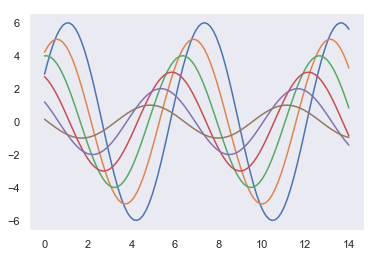

In [29]:
sns.set_style("dark")
sinplot()

white样式：

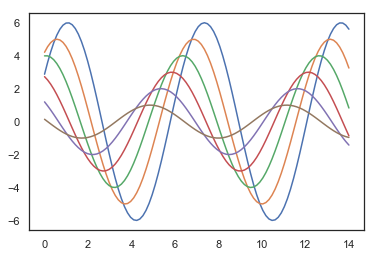

In [30]:
sns.set_style("white")
sinplot()

ticks样式：

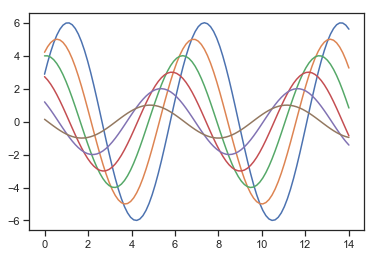

In [10]:
sns.set_style("ticks")
sinplot()

**(b) seaborn去除坐标轴**

*seaborn使用`despine()`方法来去除坐标轴；*

seaborn可以去除坐标轴(`left`, `top`, `right`, `bottom`参数)、设置坐标轴偏移量(`offset`参数)，截短坐标轴（`trim`参数），即当边框没有覆盖整个数据轴的范围的时候，trim参数会限制留存的边框范围。

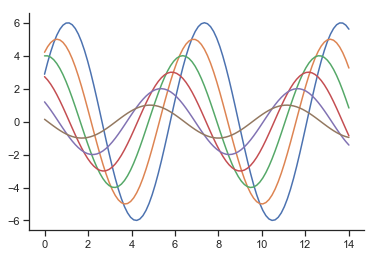

In [11]:
sinplot()
sns.despine()

/Users/mac/.venvs/spider/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


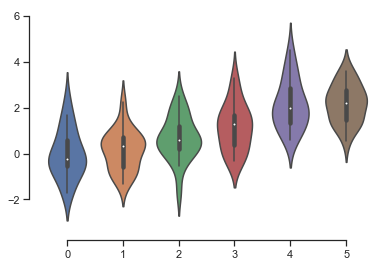

In [12]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True)

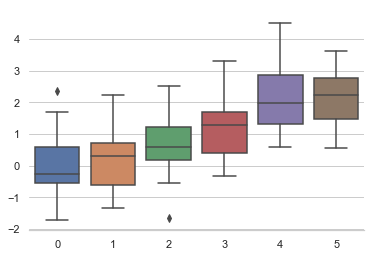

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

**(c) 临时设置图表样式**

虽然来回切换非常容易，但**sns也允许用with语句中套用axes_style()达到临时设置参数的效果（仅对with块内的绘图函数起作用）**。


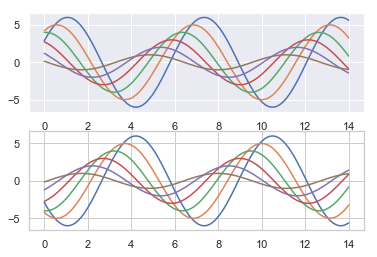

In [14]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

**(d) seaborn定制样式**--重写样式中的元素

即重写样式主题中的一些样式参数；

如果您想要定制seanborn的样式，可以将参数字典传递给`axes_style()`和`set_style()`的rc参数。注意，只能通过该方法**重写样式定义的部分样式参数**。(然而，更高层次的`set()`函数接受任何matplotlib参数的字典，**即可以重写任意样式参数**)。

In [19]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

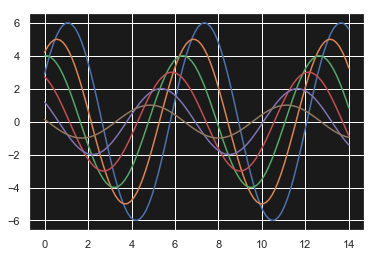

In [22]:
sns.set_style("darkgrid", {"axes.facecolor": ".1"})
sinplot()

### 1.2. 单位(scale)控制：plotting_context() & set_context() (Scaling plot elements)

**(a) seaborn context设置**

seaborn自带4种预设的contexts，按相对大小排序（从小到大）：

 + paper；
 + notebook(默认)；
 + talk；
 + poster；
 

In [23]:
sns.set()

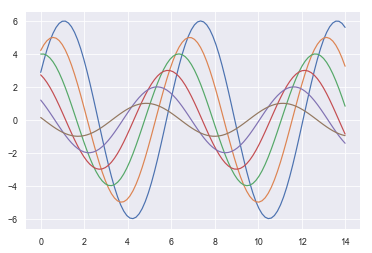

In [24]:
sns.set_context("paper")
sinplot()

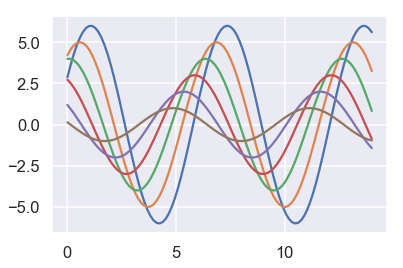

In [25]:
sns.set_context("talk")
sinplot()

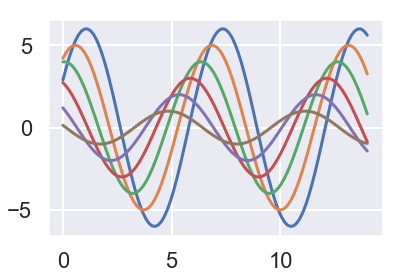

In [26]:
sns.set_context("poster")
sinplot()

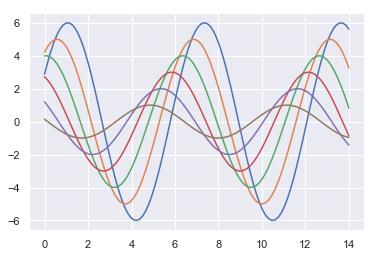

In [27]:
sns.set_context("notebook")
sinplot()

**(b) seaborn定制context**

如果您想要定制seanborn的context，可以将参数字典传递给`plotting_context()`和`set_context()`的rc参数。注意，只能通过该方法重写context定义的部分context参数。(然而，更高层次的`set()`函数接受任何matplotlib参数的字典，即可以重写任意context参数)。

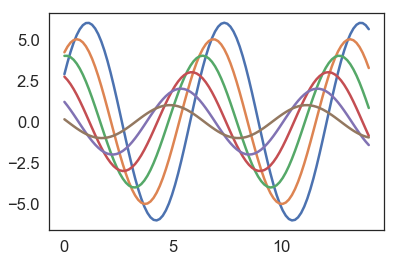

In [31]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()